# Matrix Essentials for Advanced Econometrics Part I

Feb 20, 2020 

***Zhuo Jianchao***   

## First Sight of Matrix

### Matrix as Transformation

Most of the time, matrices contain numerical values, to which mathematical meanings are attached. Any in most cases, they are treated as **transformation**. Let's use its very typical application in the linear algebra to denote this.

To solve the system of linear equations
$$
\left\{\begin{array}{1}
{x+y=17} & {(1)} \\
{2x+y=25} & {(2)}
\end{array}\right.
$$

we can plot these two equations as lines in the $x-y$ plane can find their intersection whose coordinates representing answers for $x$ and $y$ respectively. 

In [1]:
using Plots
using LaTeXStrings

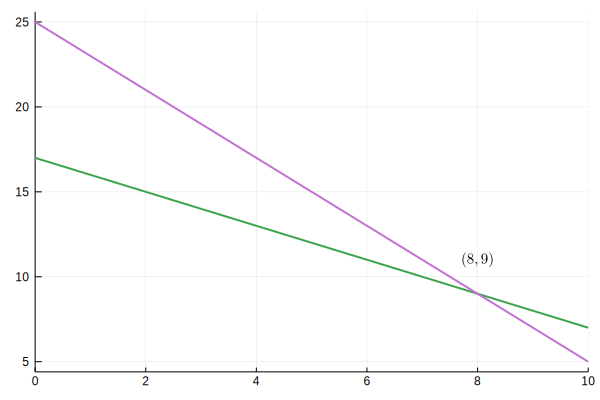

In [2]:
plt = plot(2, legend=false, xlim = (0,10))
plot!(x -> -x + 17, lw=2)
plot!(x -> -2x + 25, lw=2,
    legend=false)
annotate!(8, 11, text(L"(8,9)", 10))

From the graph above we know the solution to the equations are $x=8, y=9$.

---
We can solve the problem in the prospective of linear algebra, where the system of equations can be *rewrited* to be

$$
\begin{pmatrix}
1 & 1 \\
2 & 1
\end{pmatrix}
\begin{pmatrix}
x \\ y
\end{pmatrix}
= \begin{pmatrix}
17 \\ 25
\end{pmatrix}
$$

where the matrix
$
\mathbf{C}=
\begin{pmatrix}
1 & 1 \\
2 & 1
\end{pmatrix}
$
is called a **coefficient matrix**, and the column vector
$\begin{pmatrix}
x \\ y
\end{pmatrix}
$
is the column vector of unknown numbers we are going to solve.

We've already known that the answers to the system are $x=1, y=2$, we can take the result back to check the equality.

$$
\begin{pmatrix}
1 & 1 \\
2 & 1
\end{pmatrix}
\begin{pmatrix}
8 \\ 9
\end{pmatrix}
= \begin{pmatrix}
17 \\ 25
\end{pmatrix}
,$$ which is equivalent to

$$
\mathbf{C}
\begin{pmatrix}
8 \\ 9
\end{pmatrix}
= \begin{pmatrix}
17 \\ 25
\end{pmatrix}
$$

Now the equation can be interpreted as **the matrix $\mathbf{C}$ multiplies 
$\begin{pmatrix}
8 \\ 9
\end{pmatrix}
$ yields 
$\begin{pmatrix}
17 \\ 25
\end{pmatrix}
$**.

In fact, the matrix $\mathbf{C}$ multiplies by any 2-dimentional vector, i.e., vector with two components, results in another 2-dimentional vector. 

In [3]:
using LinearAlgebra

In [4]:
"""
calculate the column vector resulted from multiplication of C and any given 2-dimentional vector.

mult_by_C(v₁, v₂), where vᵢ stands for the ith element of the given vector.
"""
function mult_by_C(v₁::Real, v₂::Real)
    C::Array{Int64,2} = [1 1; 2 1]
    v::Array = [v₁, v₂]
    v_re::Array = C*v
    return v_re
end


"""
draw the 2-d vector.
"""
function vector!(v₁::Real, v₂::Real; l=2, a=1, c=:auto)
    quiver!([0],[0], quiver=([v₁], [v₂]), lw=l, alpha=a, color=c)
end

vector!

The function `multi_by_C()` returns a column vector produced by multiplying a column vector we put into it by the matrix $\mathbf{C}$, and `vector!()` helps to draw the a vector fixed at origin.

Let's draw the vector which is the product of $\mathbf{C}$ and
$\begin{pmatrix}
8 \\ 9
\end{pmatrix}
$, we know the answer is going to be 
$\begin{pmatrix}
17 \\ 25
\end{pmatrix}
$, let's see what we can get in the graph.

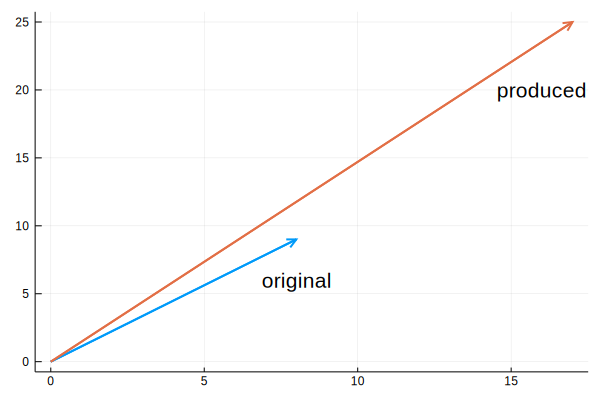

In [5]:
plt = plot(0, legend=false)

# original vector
vector!(8, 9)
annotate!(8, 6, text("original"))

# produced vector
vector!(mult_by_C(8,9)[1], mult_by_C(8,9)[2])
annotate!(16, 20, text("produced"))

The result of multiplying $\mathbf{C}$ by the vector is another 2-dimentional vector in the plane, that is to say, **the original vector is transformed into the produced vector by multiplying by a matrix**.

If we repeat the process enough times.

┌ Info: Saved animation to 
│   fn = /Users/anesontso/GaoJi-Advanced-Econometrics/supplements/Matrix Calculus/multi_produced.gif
└ @ Plots /Users/anesontso/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Users/anesontso/GaoJi-Advanced-Econometrics/supplements/Matrix Calculus/multi_produced.gif")
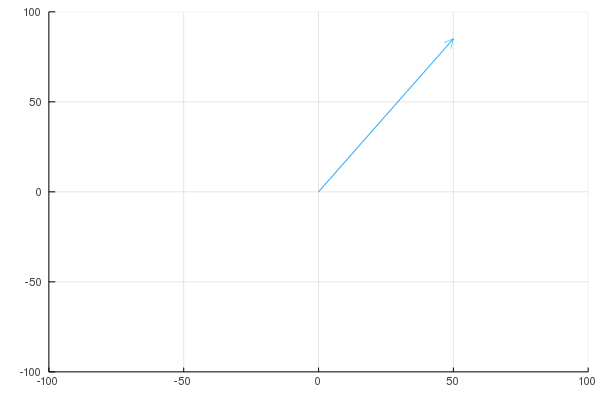

In [6]:
plt = plot(0, legend=false)
quiver(xlim=(-100,100), ylim=(-100,100))
anim = @animate for k in 1:100
        a = rand(-40:5:40)
        b = rand(-40:5:40)
        result = mult_by_C(a, b)
        vector!(result[1], result[2], l=1, a=0.5)
    end

gif(anim, "multi_produced.gif")

As we can see, the area covered by produced vectors are becoming denser and denser. If we repeat the process in large enough times even to infinity, we can actually cover the whole 2-dimentional plane. That is equivalent to say that **any 2-d vector in the plane can be found by multiplying $\mathbf{C}$ by some vector in the plane**.

So in the question above that $
\begin{pmatrix}
1 & 1 \\
2 & 1
\end{pmatrix}
\begin{pmatrix}
x \\ y
\end{pmatrix}
= \begin{pmatrix}
17 \\ 25
\end{pmatrix}
$,
we can always find a vector
$
\begin{pmatrix}
x \\
y
\end{pmatrix}
$
to balance the equation, because any 2-d vector can be constructed by multiplying by $\mathbf{C}$.

### Intuition of Matrix Transformation

In what way, the matrix transforms a vector? How to understand the underlying mechanism of the transformation of $
\mathbf{C}
\begin{pmatrix}
8 \\ 9
\end{pmatrix}
= \begin{pmatrix}
17 \\ 25
\end{pmatrix}
$?

Let's extend the graph we've drawn below to include two column vectors which combined to produce the matrix $\mathbf{C}$, that is, $\vec{u}=\begin{pmatrix}1 \\ 2\end{pmatrix}$ and $\vec{v}=\begin{pmatrix}1 \\ 1 \end{pmatrix}$

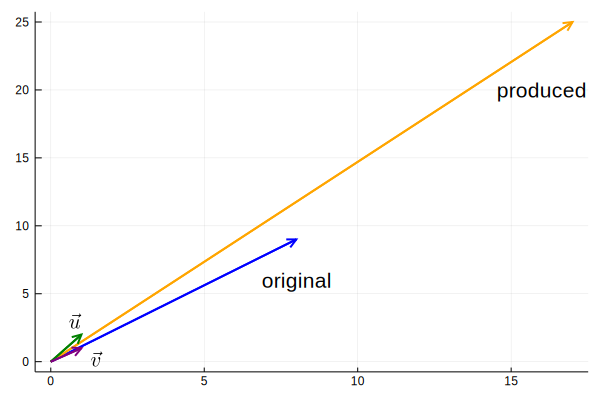

In [7]:
plt = plot(0, legend=false)

# original vector
vector!(8, 9, c=:blue)
annotate!(8, 6, text("original"))

# produced vector
vector!(mult_by_C(8,9)[1], mult_by_C(8,9)[2], c=:orange)
annotate!(16, 20, text("produced"))

vector!(1, 2, c=:green)
annotate!(0.8, 3, text(L"\vec{u}"))

vector!(1, 1, c=:purple)
annotate!(1.5, 0.2, text(L"\vec{v}"))

Here comes the question, what **combination** of $\vec{u}$ and $\vec{v}$ produces the target variable? 

The answer is right our solutions to the system of equation of $
\mathbf{C}
\begin{pmatrix}
x \\ y
\end{pmatrix}
= \begin{pmatrix}
17 \\ 25
\end{pmatrix}
$ where $
\begin{pmatrix}
x \\ y
\end{pmatrix} =
\begin{pmatrix}
8 \\ 9
\end{pmatrix}
$.

Let's check it.

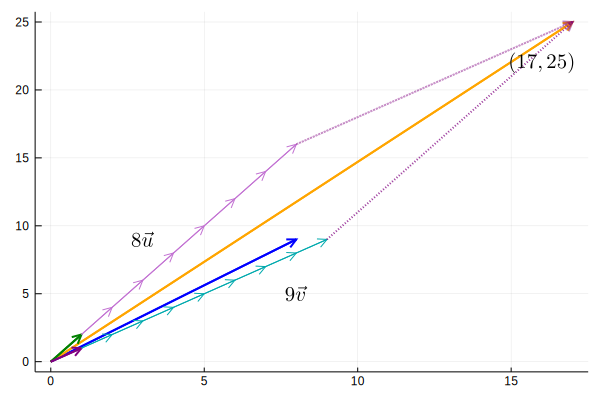

In [8]:
plt = plot(0, legend=false)

# original vector
vector!(8, 9, c=:blue)
#annotate!(8, 10, text("original"), 5)

# produced vector
vector!(mult_by_C(8,9)[1], mult_by_C(8,9)[2], c=:orange)
annotate!(16, 22, text(L"(17,25)"))

const x = 8
const y = 9

vector!(1, 2, c=:green)
quiver!([(i, 2i) for i = 1:1:x-1], quiver=([1],[2]))
annotate!(3, 9, text(L"8\vec{u}"))

vector!(1, 1, c=:purple)
quiver!([(i, i) for i = 1:1:y-1], quiver=([1],[1]))
annotate!(8, 5, text(L"9\vec{v}"))

quiver!([x, y], [2x, y], quiver=([y, x],[y, 2x]), color=:purple, lw=2, alpha=0.5, linestyle = :dot)

The equation that $8\vec{u}+9\vec{v}=\begin{pmatrix}17 \\ 25 \end{pmatrix}$ indicates that the target vector can be derived by some combination of $\vec{u}$ and $\vec{v}$. 

In fact, it's straightforward even look at the arithmetic definition of multiplication of matrix and a column vector.

$\mathbf{C} \begin{pmatrix} 8 \\ 9 \end{pmatrix} = \begin{pmatrix} \vec{u} & \vec{v} \end{pmatrix} \begin{pmatrix} 8 \\ 9 \end{pmatrix} = 8 \vec{u} + 9 \vec{v} = \begin{pmatrix}17 \\ 25 \end{pmatrix}$

The rectangular coordinate system is a regular way for us to analyse objects in a 2-dimentional plane. It's an interface to *locate* objects with two coordinates. If we broaden our views to think of a new coordinate system where $\vec{u}$ and $\vec{v}$ are two axes of it. Then the produced vector has coordinates $(8,9)$ in the *new* coordinates system.

So a matrix is not only a transformation of vectors but also of coordinate systems. The **target vector in the transformed coordinate system is the original vector in the original coordinate system**.

### Invertible Matrix

Since a matrix is a transformation of vectors, sometimes we can find another matrix to **counter** the transformation imposed by the former matrix. In this case, this counter matrix is an inverse matrix of the former one. 

Since that $
\mathbf{C}
\begin{pmatrix}
8 \\ 9
\end{pmatrix}
= \begin{pmatrix}
17 \\ 25
\end{pmatrix}$, where $\mathbf{C}=\begin{pmatrix} 1 & 1 \\ 2 & 1 \end{pmatrix}$, then we can find the inverse matrix $\mathbf{C^{-1}}$ to counter the transformation imposed by $\mathbf{C}$.

In [9]:
C = [1 1; 2 1]
C^(-1)

2×2 Array{Float64,2}:
 -1.0   1.0
  2.0  -1.0

Then we have $\mathbf{C^{-1}} \mathbf{C} \begin{pmatrix} 8 \\ 9 \end{pmatrix} = \begin{pmatrix} -1 & 1 \\ 2 & -1 \end{pmatrix} \begin{pmatrix} 1 & 1 \\ 2 & 1 \end{pmatrix} \begin{pmatrix} 8 \\ 9 \end{pmatrix} = \begin{pmatrix} -1 & 1 \\ 2 & -1 \end{pmatrix} \begin{pmatrix} 17 \\ 25 \end{pmatrix} = \begin{pmatrix} 8 \\ 9 \end{pmatrix}$

Divide $\mathbf{C}$ into two column vectors $\vec{u}$ and $\vec{v}$, that is, $\mathbf{C}=\begin{pmatrix} \vec{u} & \vec{v} \end{pmatrix}$.

We've known that in $
\mathbf{C}
\begin{pmatrix}
8 \\ 9
\end{pmatrix}
= \begin{pmatrix}
\vec{u} & \vec{v}
\end{pmatrix}
\begin{pmatrix}
8 \\ 9
\end{pmatrix}
= \begin{pmatrix}
17 \\ 25
\end{pmatrix}$, 
$\begin{pmatrix}
8 \\ 9
\end{pmatrix}$
is the coordinates of $
\begin{pmatrix}
17 \\ 25
\end{pmatrix}$ 
in the coordinate system of 
$\begin{pmatrix}
\vec{u} & \vec{v}
\end{pmatrix}$

Then by multiplying the **inverse transformation** of $\begin{pmatrix}
\vec{u} & \vec{v}
\end{pmatrix}$,
we retrive the coordinates of the target vector.

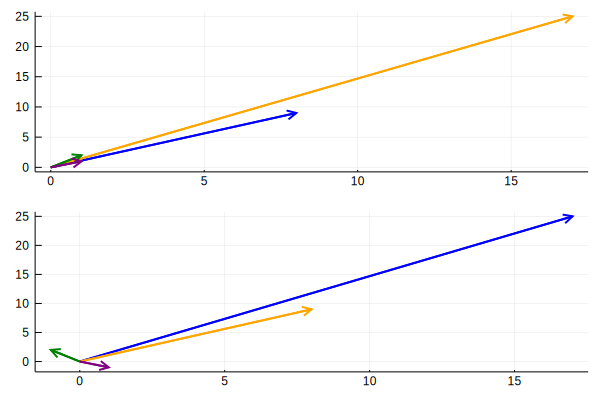

In [10]:
plt1 = plot(0, legend=false)

original = [8; 9]
C = [1 1; 2 1]
target = C*original

vector!(original[1], original[2], c=:blue)
vector!(target[1], target[2], c=:orange)
vector!(C[:,1][1], C[:,1][2], c=:green)
vector!(C[:,2][1], C[:,2][2], c=:purple)


plt2 = plot(0, legend=false)

original = [17; 25]
C_inv = [-1 1; 2 -1]
target = C_inv*original

vector!(original[1], original[2], c=:blue)
vector!(target[1], target[2], c=:orange)
vector!(C_inv[:,1][1], C_inv[:,1][2], c=:green)
vector!(C_inv[:,2][1], C_inv[:,2][2], c=:purple)


plot(plt1, plt2, layout=(2,1))

See how origional vector and target vector interact in two graphs.

A matrix not always has its inverse matrix. Let's take an example, $\mathbf{C'}=\begin{pmatrix} 1 & 2 \\ 2 & 4 \end{pmatrix}$. 

We can use the matrix $\mathbf{C'}$ to multiply a bounch of vectors in the $(x-y)$ plane, and see what we get.

┌ Info: Saved animation to 
│   fn = /Users/anesontso/GaoJi-Advanced-Econometrics/supplements/Matrix Calculus/multi_not_inverse.gif
└ @ Plots /Users/anesontso/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Users/anesontso/GaoJi-Advanced-Econometrics/supplements/Matrix Calculus/multi_not_inverse.gif")
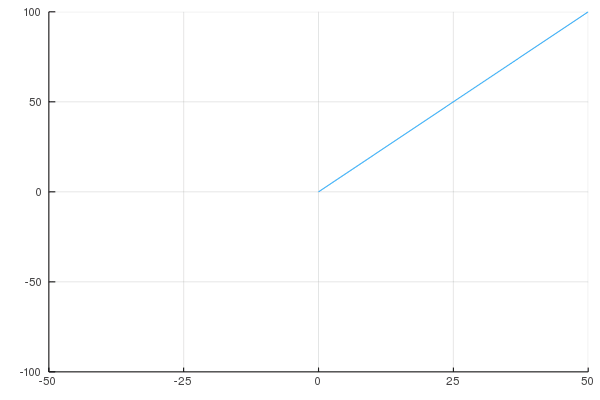

In [11]:
plt = plot(0, legend=false)
quiver(xlim=(-50,50), ylim=(-100,100))
C_not_inverse = [1 2; 2 4]

anim = @animate for k in 1:100
        a = rand(-40:5:40)
        b = rand(-40:5:40)
        x = [a; b]
        result = C_not_inverse * x
        vector!(result[1], result[2], l=1, a=0.5)
    end

gif(anim, "multi_not_inverse.gif")

No matter what column vectors in the $(x-y)$ plane multiplied by the matrix $\mathbf{C'}$, the result is always a vector **along a line** in the plane. That is equivalent to say, **given a vector beyond the line, we can never find its original vector through the inverse transformation of $\mathbf{C'}$**. Then, the matrix $\mathbf{C'}$ is **not invertible**, or the matrix $\mathbf{C'}$ is **singular**.

We can decompose the matrix $\mathbf{C'}$ to see what makes it not invertible. Remember that a matrix is a transformation of coordinate systems, where the column vectors of the matrix are axes of it, since $\mathbf{C'}=\begin{pmatrix} 1 & 2 \\ 2 & 4 \end{pmatrix} = \begin{pmatrix} \vec{u'} & \vec{v'} \end{pmatrix}$, we can draw it.

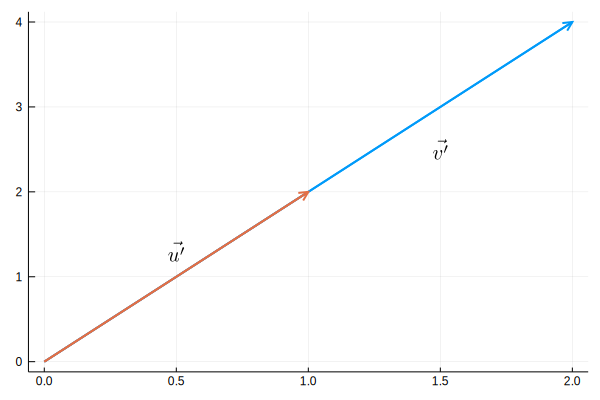

In [12]:
plt = plot(0, legend=false)

vector!(2, 4, l = 2)
annotate!(1.5, 2.5, text(L"\vec{v'}"))

vector!(1, 2, l = 2)
annotate!(0.5, 1.3, text(L"\vec{u'}"))

We can see that axes $\vec{u'}$ and $\vec{v'}$ themselves are **along the same line** in the plane. 

$\mathbf{C'} \begin{pmatrix} a \\ b \end{pmatrix} = \begin{pmatrix} \vec{u'} & \vec{v'} \end{pmatrix} \begin{pmatrix} a \\ b \end{pmatrix} = a \vec{u} + b \vec{v}$, where $\begin{pmatrix} a \\ b \end{pmatrix}$ is any vector in the plane, indicates that, no matter what the vector is, multiplied by the matrix $\mathbf{C'}$ is always  the “lengthening” or "shortening" of the $\vec{u'}$ or $\vec{v'}$.

As for the invertible matrix $\mathbf{C}$, all the combinations of its column vector fill the whole 2-dimentional plane, while the combinations of column vectors of $\mathbf{C'}$ only form a single line in the plane, that is to say, **the matrix $\mathbf{C}$ expands the 2-d space, whereas the matrix $\mathbf{C'}$ expands a line, a so-called subspace in the 2-d space**.

The invertible matrix can expand to the whole space, while a singular matrix only expands a subspace, making it unable to recover transformation.

An invertible matrix is like a VR game, where the scene is the simulation of a real room, while the singular matrix is like a photograph of this scene, you can never restore the true details from a picture.